In [72]:
import os
import numpy as np
import pandas as pd

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [12]:
root = '../data/split/'

In [24]:
train_data = datasets.ImageFolder(os.path.join(root, 'train'))
val_data = datasets.ImageFolder(os.path.join(root, 'val'))

# Random samples

In [115]:
import math

In [116]:
samples = np.random.randint(0, len(train_data), 11)

<Figure size 1200x600 with 0 Axes>

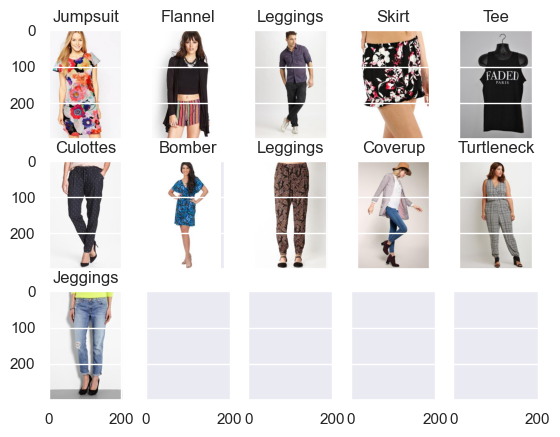

In [118]:
cols = 5
rows = math.ceil(len(samples) / cols)
plt.figure(figsize=(4 * rows, 6))
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True)
idx = 0
for r in range(rows):
    for c in range(cols):
        if idx == len(samples):
            break
        img = samples[idx]
        label = train_data.classes[train_data.imgs[img][1]]
        axs[r, c].imshow(Image.open(train_data.imgs[img][0]))
        axs[r, c].set_title(label)
        idx += 1

plt.show()

# Class Distribution

In [25]:
from collections import Counter

/Users/rainalex/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


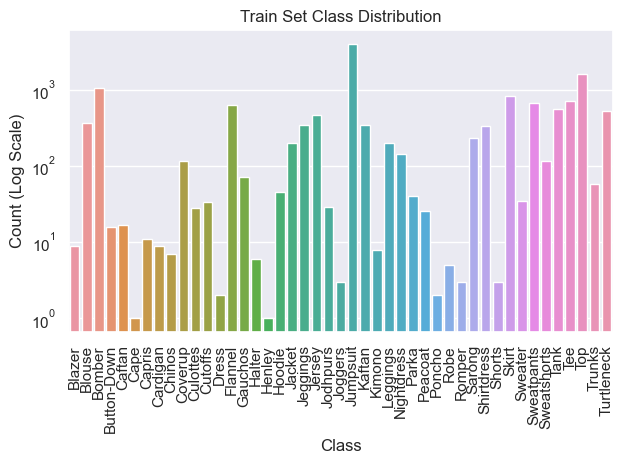

In [49]:
train_class_counts = Counter(train_data.targets)
sns.barplot(x=train_data.classes, y=list(train_class_counts.values()))
plt.xticks(rotation=90)
plt.title('Train Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')
plt.tight_layout()
plt.show()

/Users/rainalex/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


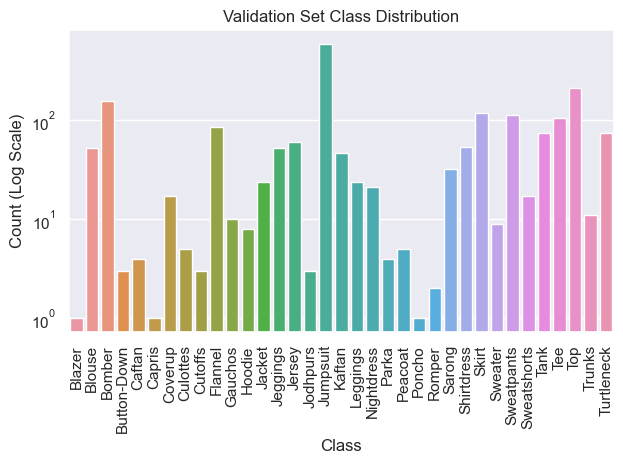

In [50]:
val_class_counts = Counter(val_data.targets)
sns.barplot(x=val_data.classes, y=list(val_class_counts.values()))
plt.xticks(rotation=90)
plt.title('Validation Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Image Sizes
Width avg = 227\
Height avg = 300

In [51]:
from PIL import Image

In [61]:
widths = []
heights = []

for sample in train_data.imgs:
    img = Image.open(sample[0])
    w, h = img.size
    widths.append(w)
    heights.append(h)

In [62]:
len(widths), len(heights)

(14000, 14000)

Text(35.0, 0.5, 'Heights')

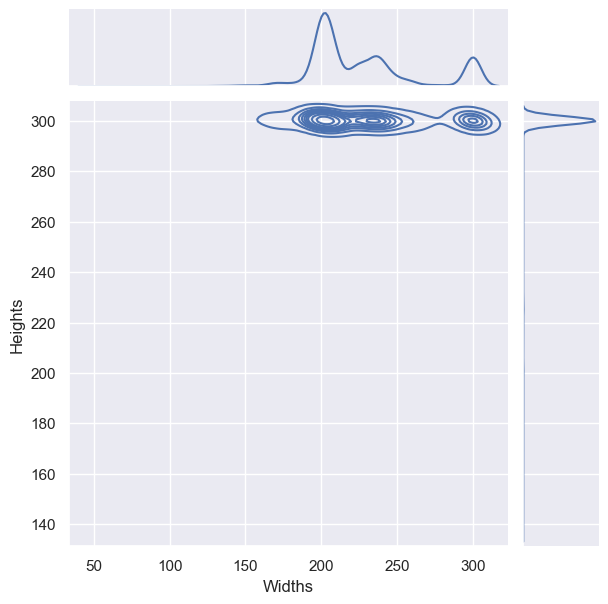

In [77]:
sns.jointplot(x=widths, y=heights, kind='kde')
plt.xlabel('Widths')
plt.ylabel('Heights')

In [81]:
pd.DataFrame(widths, columns=['widths']).describe()

,widths
count,14000.000000
mean,227.255143
std,36.215839
min,56.000000
25%,200.000000
50%,211.000000
75%,240.000000
max,301.000000


In [82]:
pd.DataFrame(heights, columns=['heights']).describe()

,heights
count,14000.000000
mean,298.796071
std,11.001116
min,138.000000
25%,300.000000
50%,300.000000
75%,300.000000
max,301.000000


# Color Histograms
Several high values, likely due to most of the images being commercial images, against a white background

In [119]:
import cv2

In [ ]:
def plot_color_histogram(image_path):
    img = cv2.imread(image_path)
    colors = ('b', 'g', 'r')
    _, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[1, 3], height_ratios=[1])
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        ax1.imshow(Image.open(image_path))
        ax2.plot(hist, color=color)
        # fig.title("Color Histogram")
    plt.show()

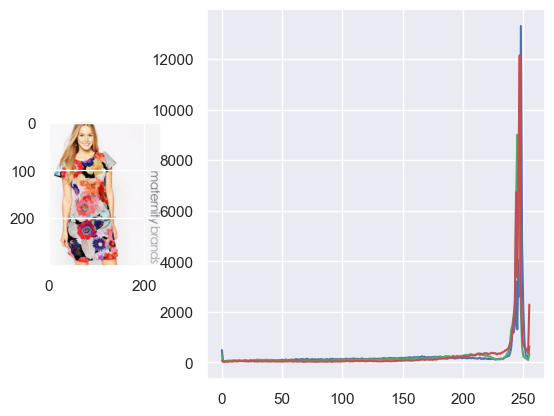

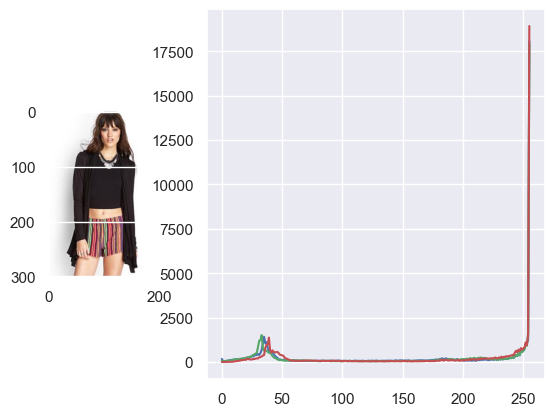

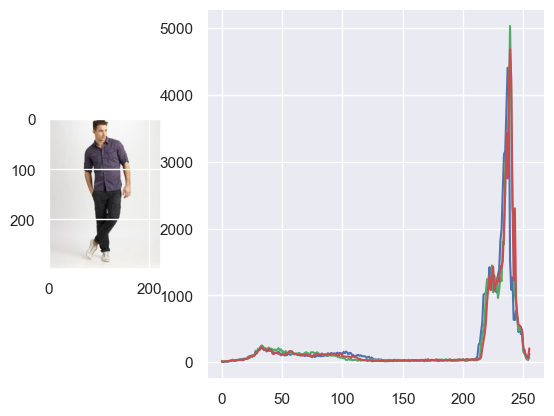

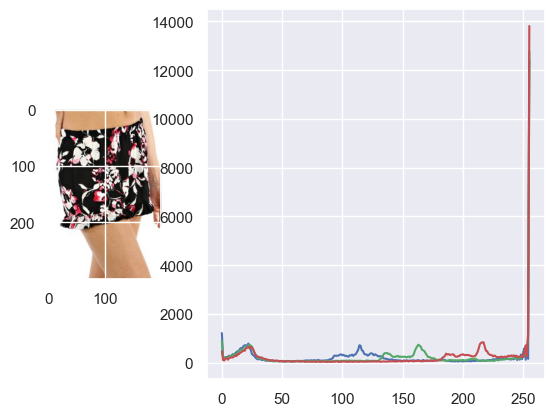

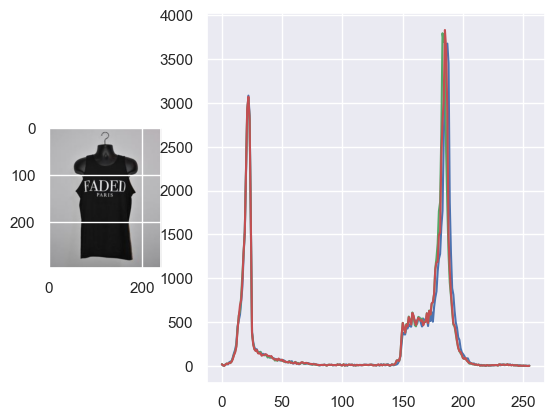

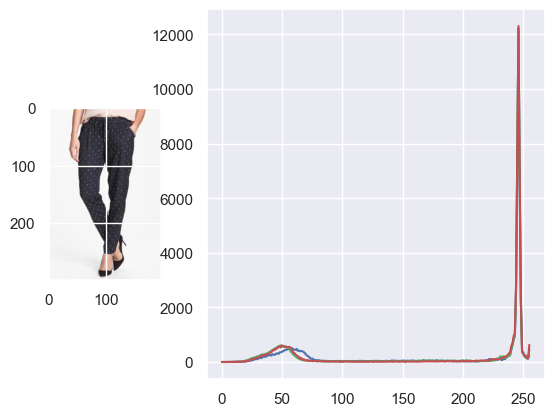

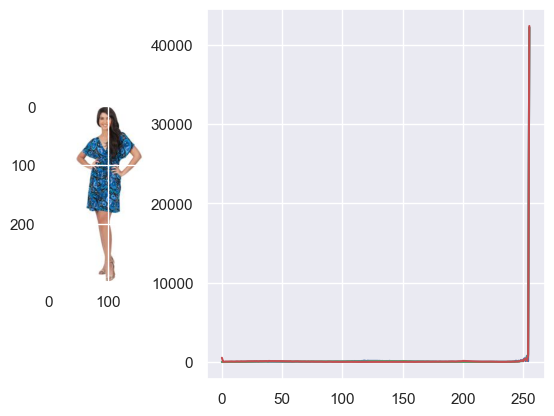

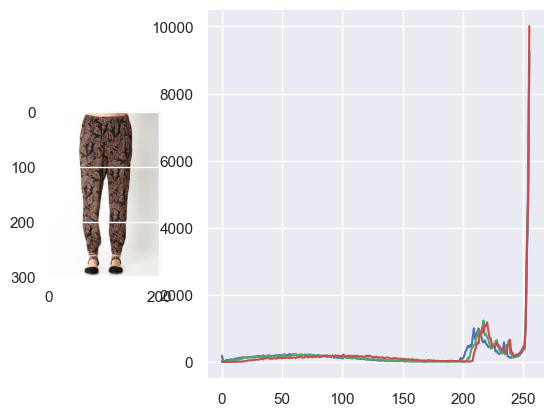

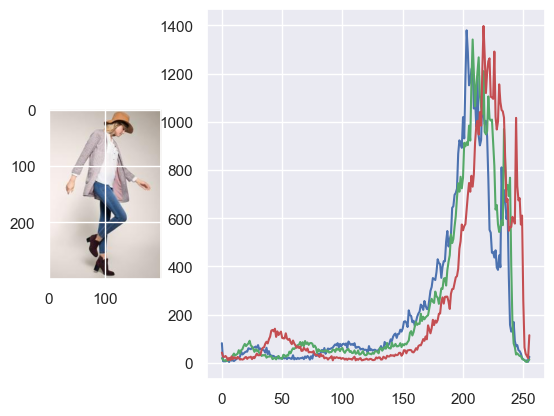

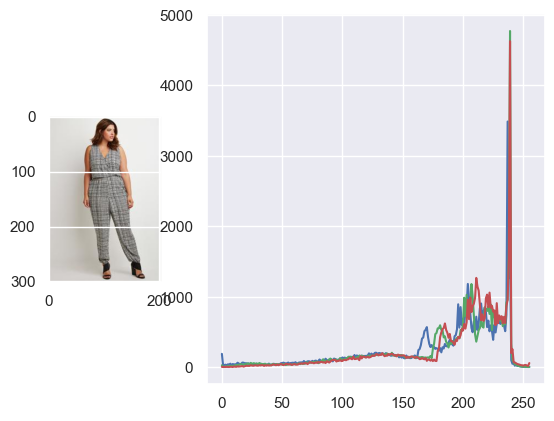

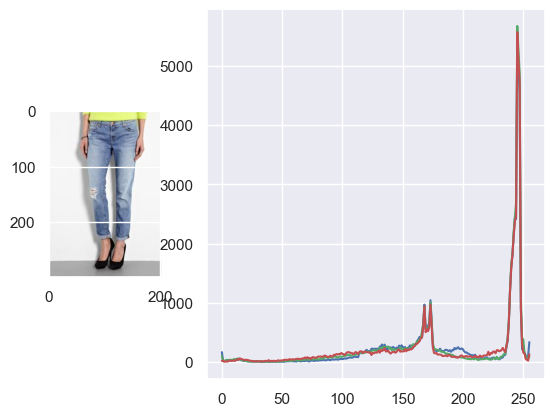

In [ ]:
histogram_count = 3
for s in samples[:]:
    plot_color_histogram(train_data.imgs[s][0])

## Average Colors

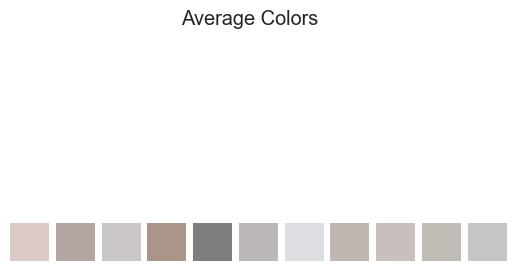

In [154]:
def get_avg_color(img_path):
    img = Image.open(img_path).convert("RGB")
    img_np = np.array(img)
    return img_np.mean(axis=(0, 1))  # mean over width & height

# Example: plot average color for a few samples
# sample_paths = [train_data.imgs[i][0] for i in np.random.randint(0, len(train_data), 10)]
avg_colors = [get_avg_color(train_data.imgs[s][0]) for s in samples]

for i, color in enumerate(avg_colors):
    plt.subplot(1, len(samples), i + 1)
    plt.imshow(np.ones((10, 10, 3), dtype=np.uint8) * color.astype(np.uint8))
    plt.axis('off')
plt.suptitle("Average Colors")
plt.show()

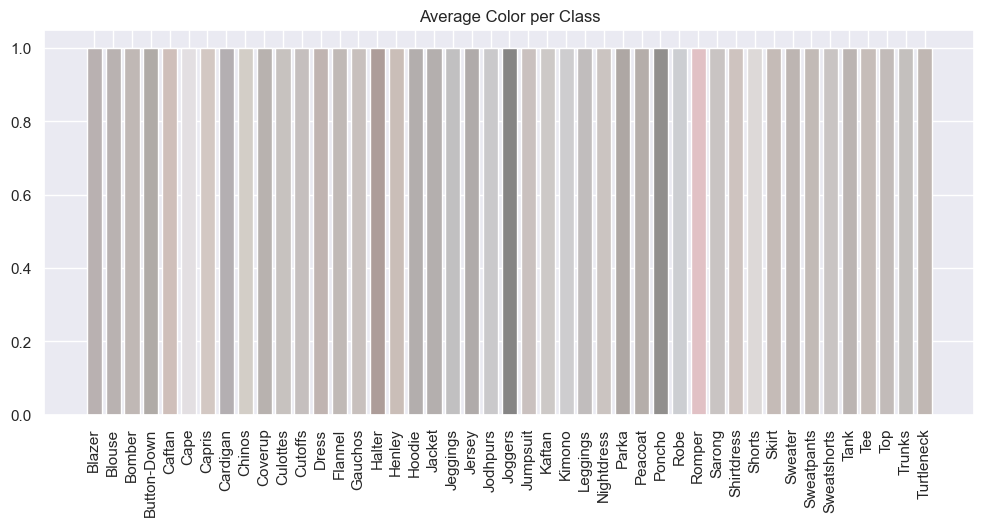

In [151]:
from collections import defaultdict

class_avgs = defaultdict(list)

for path, label in train_data.imgs:
    avg_color = get_avg_color(path)
    class_avgs[label].append(avg_color)

# Compute class-wise average
class_avg_colors = {label: np.mean(colors, axis=0) for label, colors in class_avgs.items()}

# Visualize
plt.figure(figsize=(12, 5))
for label, color in class_avg_colors.items():
    plt.bar(train_data.classes[label], 1, color=color / 255)
plt.xticks(rotation=90)
plt.title("Average Color per Class")
plt.show()


In [164]:
romper_idx = train_data.class_to_idx['Romper']
romper_imgs = [img[0] for img in train_data.imgs if img[1] == romper_idx]

In [167]:
len(romper_imgs)

3

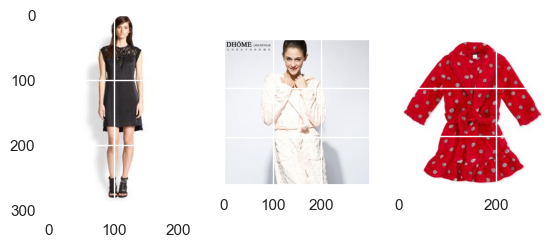

In [170]:
_, axs = plt.subplots(1, len(romper_imgs), sharey=True)
for i in range(len(romper_imgs)):
    axs[i].imshow(Image.open(romper_imgs[i]))